In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout,Conv2D,Input,MaxPool2D
import matplotlib.pyplot as plt


In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
  inflating: Agricultural-crops/Cherry/image15.jpeg  
  inflating: Agricultural-crops/Cherry/image16.jpeg  
  inflating: Agricultural-crops/Cherry/image17.jpeg  
  inflating: Agricultural-crops/Cherry/image18.jpeg  
  inflating: Agricultural-crops/Cherry/image20.jpeg  
  inflating: Agricultural-crops/Cherry/image21.jpeg  
  inflating: Agricultural-crops/Cherry/image22.jpeg  
  inflating: Agricultural-crops/Cherry/image24.jpeg  
  inflating: Agricultural-crops/Cherry/image25.jpeg  
  inflating: Agricultural-crops/Cherry/image27.jpeg  
  inflating: Agricultural-crops/Cherry/image28.jpeg  
  inflating: Agricultural-crops/Cherry/image29.jpeg  
  inflating: Agricultural-crops/Cherry/image30.jpeg  
  inflating: Agricultural-crops/Cherry/image31.jpeg  
  inflating: Agricultural-crops/Cherry/images11.jpg  
  inflating: Agricultural-crops/Cherry/images16.jpg  
  inflating: Agricultural-crops/Cherry/images17.jpg  
  inflating: Agricultural-crops/Cherry/images19.jpg  
  infl

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio('/content/Agricultural-crops',output='Dataimage',seed=1337,ratio=(0.7,0.2,0.1))

Copying files: 829 files [00:01, 554.38 files/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(1./255)
train_gen=train_generator.flow_from_directory('/content/Dataimage/train',target_size=(224,224),batch_size=32)

Found 569 images belonging to 30 classes.


In [ ]:
test_generator=ImageDataGenerator(1./255)
test_gen=test_generator.flow_from_directory('/content/Dataimage/test',target_size=(224,224),batch_size=32)

Found 105 images belonging to 30 classes.


In [ ]:
images,labels=next(train_gen)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


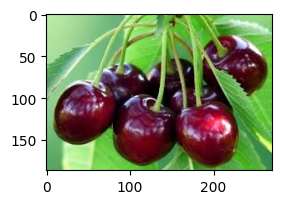

In [ ]:
from PIL import Image
plt.subplot(221)
plt.imshow(Image.open('/content/Dataimage/test/Cherry/images20.jpg'))

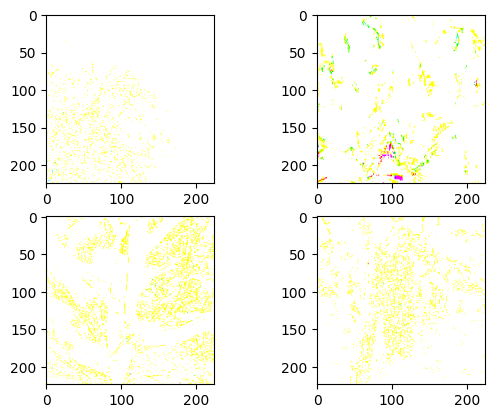

In [ ]:
plt.subplot(221)
plt.imshow(images[0])

plt.subplot(222)
plt.imshow(images[1])

plt.subplot(223)
plt.imshow(images[2])

plt.subplot(224)
plt.imshow(images[3])

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=(224,224,3),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(keras.layers.Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224, 224, 128)     512       
                                                                 
 dense_1 (Dense)             (None, 224, 224, 64)      8256      
                                                                 
 dense_2 (Dense)             (None, 224, 224, 8)       520       
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 401409    
                                                                 
Total params: 410697 (1.57 MB)
Trainable params: 410697 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(train_gen,epochs=2,validation_data=(train_gen))

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/2
18/18 [==============================] - 152s 8s/step - loss: 119.8279 - accuracy: 0.8617 - val_loss: 0.6464 - val_accuracy: 0.9667
Epoch 2/2
18/18 [==============================] - 204s 12s/step - loss: 0.6443 - accuracy: 0.9667 - val_loss: 0.6252 - val_accuracy: 0.9667


In [ ]:
model.evaluate(test_gen,verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


4/4 [==============================] - 7s 2s/step - loss: 0.6832 - accuracy: 0.9667


[0.6831769943237305, 0.966666579246521]

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(keras.layers.Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 128)     0         
                                                                 
 dense_4 (Dense)             (None, 111, 111, 64)      8256      
                                                                 
 dense_5 (Dense)             (None, 111, 111, 8)       520       
                                                                 
 flatten_1 (Flatten)         (None, 98568)             0         
                                                      

In [ ]:
model.fit(train_gen,epochs=2,validation_data=(train_gen))

Epoch 1/2
18/18 [==============================] - 181s 10s/step - loss: 4.1351 - accuracy: 0.8814 - val_loss: 0.6892 - val_accuracy: 0.9585
Epoch 2/2
18/18 [==============================] - 151s 9s/step - loss: 0.1901 - accuracy: 0.9667 - val_loss: 0.6879 - val_accuracy: 0.9667


In [ ]:
from keras.applications.vgg16 import VGG16

base_model=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False
base_model.summary()


58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model=Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                1605696   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16320449 (62.26 MB)
Trainable params: 1605761 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
model.fit(train_gen,epochs=2,validation_data=(train_gen))

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/2
18/18 [==============================] - 665s 37s/step - loss: 2.8117 - accuracy: 0.9011 - val_loss: 1.5769 - val_accuracy: 0.9552
Epoch 2/2
18/18 [==============================] - 643s 37s/step - loss: 1.1974 - accuracy: 0.9486 - val_loss: 0.8415 - val_accuracy: 0.9437


In [ ]:
model.evaluate(test_gen,verbose=1)

4/4 [==============================] - 56s 13s/step - loss: 0.2211 - accuracy: 0.9667


[0.2210775762796402, 0.966666579246521]